In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
# Download the data set
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().values.any()

False

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Understand diffrence between count of fraud and non-fraud Transactions

Text(0, 0.5, 'Frequency')

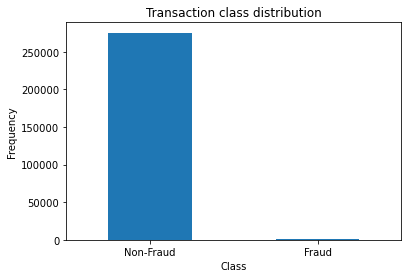

In [28]:
# get count of fraud and non-fraud
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ["Non-Fraud", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")

=> As we can see our data is highly imbalanced

<b> Checking Count of fraud and non fraud

In [7]:
counts = pd.value_counts(data['Class'])
counts

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Understaning Data
total_transactions = len(data)
fraud = len(data[data.Class==1])
normal = len(data[data.Class==0])
fraud_per = round(fraud/normal*100, 2)
print("Total Transactions :", total_transactions)
print("Total Fraud Transactions:", fraud)
print("Total Sucessful Transactions:", normal)
print("Percentage of Fraud Transactions:", fraud_per)

Total Transactions : 284807
Total Fraud Transactions: 492
Total Sucessful Transactions: 284315
Percentage of Fraud Transactions: 0.17


#### Plotting time of transaction to check for correlations with Fraud and Non-fraud

In [10]:
frauds = data[data.Class == 1]
normal = data[data.Class == 0]

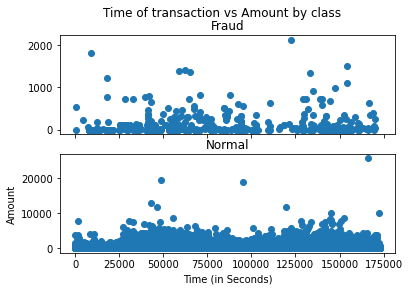

In [11]:
# plot a graph 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

##### As we can observe here there is no coreelation between time and amount. so we simply going to drop Time column here

In [12]:
# this dosen't impact on our data
data.drop(['Time'], axis=1, inplace=True)

#### Here, We can observe that the difference between min and max amount is huge. so it's a good practice to scale this variable.

In [13]:
min(data.Amount), max(data.Amount)

(0.0, 25691.16)

In [30]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount']= sc.fit_transform(amount.reshape(-1, 1))
data["Amount"]

0         0.233169
1        -0.347092
2         1.137702
3         0.130015
4        -0.081308
            ...   
284802   -0.354675
284803   -0.259814
284804   -0.089641
284805   -0.318223
284806    0.499269
Name: Amount, Length: 275663, dtype: float64

In [15]:
# drop duplicates 
data.drop_duplicates(inplace=True)
data.shape

(275663, 30)

### Selecting Prediction Target

In [29]:
X = data.drop(['Class'], axis=1).values
y = data['Class'].values

<b> Spliting data into test and train

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Create Model

| DecisionTreeClassifier Model

In [18]:
DT = DecisionTreeClassifier(max_depth=4, criterion='entropy')

DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [19]:
print(classification_report(y_test, DT_pred))
print("Accuracy Score For Decision Tree Model is ", accuracy_score(y_test, DT_pred))
print("F1 Score For Decision Tree Model is ", f1_score(y_test, DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.83      0.70      0.76       128

    accuracy                           1.00     68916
   macro avg       0.92      0.85      0.88     68916
weighted avg       1.00      1.00      1.00     68916

Accuracy Score For Decision Tree Model is  0.9991729061466132
F1 Score For Decision Tree Model is  0.7574468085106382


 | XGBoot Classifier

In [20]:
xgb = XGBClassifier(max_depth=4)

xgb.fit(X_train, y_train)
xgb_pre = xgb.predict(X_test)

In [21]:
print(classification_report(y_test, xgb_pre))
print("Accuracy Score For XGBClassifier Model is ", accuracy_score(y_test, xgb_pre))
print("F1 Score For XGBClassifier Model is ", f1_score(y_test, xgb_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.98      0.75      0.85       128

    accuracy                           1.00     68916
   macro avg       0.99      0.87      0.92     68916
weighted avg       1.00      1.00      1.00     68916

Accuracy Score For XGBClassifier Model is  0.999506645771664
F1 Score For XGBClassifier Model is  0.8495575221238937


| Logistic Regression

In [22]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pre= LR.predict(X_test)

In [23]:
print(classification_report(y_test, LR_pre))
print("Accuracy Score For Logistic Regression Model is ", accuracy_score(y_test, LR_pre))
print("F1 Score For Logistic Regression Model is ", f1_score(y_test, LR_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.82      0.56      0.67       128

    accuracy                           1.00     68916
   macro avg       0.91      0.78      0.83     68916
weighted avg       1.00      1.00      1.00     68916

Accuracy Score For Logistic Regression Model is  0.9989552498694062
F1 Score For Logistic Regression Model is  0.6666666666666666


| K-Nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pre = knn.predict(X_test)

In [25]:
print(classification_report(y_test, knn_pre))
print("Accuracy Score For K-Nearest Neighbors Model is ", accuracy_score(y_test, knn_pre))
print("F1 Score For K-Nearest Neighbors Model is ", f1_score(y_test, knn_pre))
print("Confusion matrix:", confusion_matrix(y_test, knn_pre, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.96      0.73      0.83       128

    accuracy                           1.00     68916
   macro avg       0.98      0.87      0.92     68916
weighted avg       1.00      1.00      1.00     68916

Accuracy Score For K-Nearest Neighbors Model is  0.9994486040977422
F1 Score For K-Nearest Neighbors Model is  0.831858407079646
Confusion matrix: [[68784     4]
 [   34    94]]


### Conclusion
So the conclusion is we recived 99.95% accurancy in our credit card fraud detection.<br>
This number should not be surprising as our data was balanced towards one class.
